In [ ]:
from google.colab import files
files.upload()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
data = pd.read_csv("/content/diabetesData.csv")

In [ ]:
data.head()

,num_preg,plasma_glucose_conc,bp,tricepsthickness,insulin,BMI,pedigree_func,age,target
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [ ]:
data['target'] = data['target'].apply(lambda x: 1 if x == 'tested_positive' else 0)

In [ ]:
data.isnull().sum()

,0
num_preg,0
plasma_glucose_conc,0
bp,0
tricepsthickness,0
insulin,0
BMI,0
pedigree_func,0
age,0
target,0


In [ ]:
data.duplicated().sum()

0

In [ ]:
x = data.drop(['target'],axis = 1)
y = data['target']

In [ ]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x = pd.DataFrame(x)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
prediction = model.predict(x_test)

In [ ]:
print(prediction)

[0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 1 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0]


In [ ]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [ ]:
accuracy_score(y_test,prediction)*100

75.32467532467533

In [ ]:
conf = confusion_matrix(y_test,prediction)
print(conf)

[[79 20]
 [18 37]]


<Axes: >

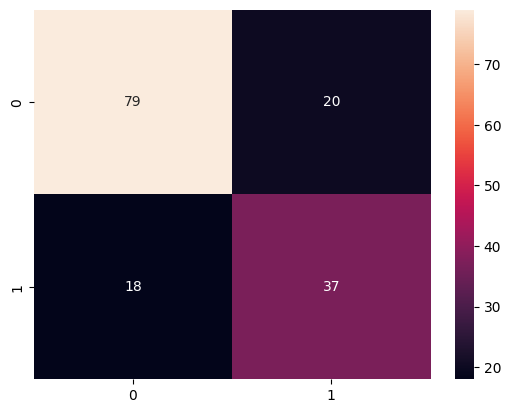

In [ ]:
sns.heatmap(conf,annot = True,fmt='d')